# Optimisez la gestion des données d'une boutique avec R ou Python

### Import des modules & dataset


In [3]:
# Import des libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore

In [4]:
#Paramètrages des outils graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['font.size'] = 16

In [5]:
# chargement des données
df_erp = pd.read_excel("erp.xlsx")
df_liaison = pd.read_excel("liaison.xlsx")
df_web = pd.read_excel("web.xlsx")


## I) Première observation  

In [6]:
#Visualisation  des 3 dataframes
print(df_erp.info())
print("----")
print(df_liaison.info())
print("----")
print(df_web.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB
None
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------      

In [7]:
# privilégier Shape Afin de connaître la structure du DataFrame
df_web.shape

(1513, 28)

In [8]:
df_liaison.shape

(825, 2)

In [9]:
df_erp.shape

(825, 5)

# I.2 Exploration Dataframe 

### Élaboration des fonctions 

In [10]:
## création fonction doublons par colonne.
def checkedduplicated(bernard):
    columns = bernard.columns
    for column in columns :
        print (column,sum(bernard[column].duplicated()))

In [11]:
 
##Analyse Dataframe on crée la foncton "doublon"
def doublons(df): # Nombre de doublons dans la dataframe
    print(len(df) - len(df.drop_duplicates()), 'doublons')


# 1.3 Analyse des données dupliquées

In [12]:
doublons(df_erp)

0 doublons


In [13]:
doublons(df_liaison)

0 doublons


In [14]:
doublons(df_web)

82 doublons


      On compte des données duppliquées dans la tables Web

In [15]:
# inspection des doublons cette fois par colonne
checkedduplicated (df_web)

sku 798
virtual 1512
downloadable 1512
rating_count 1512
average_rating 1511
total_sales 1471
tax_status 1511
tax_class 1512
post_author 1510
post_date 796
post_date_gmt 796
post_content 1512
post_title 799
post_excerpt 833
post_status 1511
comment_status 1511
ping_status 1511
post_password 1512
post_name 796
post_modified 923
post_modified_gmt 923
post_content_filtered 1512
post_parent 1511
guid 82
menu_order 1511
post_type 1510
post_mime_type 1511
comment_count 1511


In [16]:
checkedduplicated (df_erp)

product_id 0
onsale_web 823
price 444
stock_quantity 697
stock_status 823


In [17]:
checkedduplicated (df_liaison)

product_id 0
id_web 90


In [18]:
#Méthode .duplicated() pour identifier la présence de doublons
print(df_web.duplicated().sum())
print(df_erp.duplicated().sum())
print(df_liaison.duplicated().sum())

82
0
0


A ce stade (Product_id) 
Rempli les conditions adéquat pour être utilisé Comme Clé Primaire.
A l'instar de la colonne Sku que l'on se doit de  traiter.

## 1.4 Élaboration 2 Fonction "Clé primaire"

In [19]:
##Fonction Check Clé primaire

def cle_primaire(df_cle): # Vérification de la clé primaire
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')
    


In [20]:
def checkClePrimaire(dataframe):
    colonnes = dataframe.columns
    compteur = 0
    for colonne in colonnes:
        if dataframe[colonne].drop_duplicates().shape[0] == dataframe[colonne].shape[0]:
            print(f"La colonne {colonne} peut être utilisé comme clé primaire")
            compteur+=1
    if compteur == 0:
        print("Aucune colonne ne peut être utilisée comme clé primaire")

In [21]:
checkClePrimaire(df_web)

Aucune colonne ne peut être utilisée comme clé primaire


In [22]:
checkClePrimaire(df_liaison)

La colonne product_id peut être utilisé comme clé primaire


In [23]:
checkClePrimaire(df_erp)

La colonne product_id peut être utilisé comme clé primaire


In [24]:
cle_primaire(df_erp['product_id'])

Clé primaire (0 doublon)


In [25]:
cle_primaire(df_liaison['product_id'])

Clé primaire (0 doublon)


In [26]:
cle_primaire(df_web['sku'])

Pas une clé primaire ( 798 doublons )


Les variables "product_id" des dataframes (df_erp) et (df_laison) ne contiennent aucune valeur manquante ou aberrante. 
Contrairement à la variable Sku repertorié dans la dataframe (df_web) soit 798 doublons.

## 1.5 Analyse des valeurs manquantes

In [27]:
#Méthode .isnull() ( valleur nulle ) sur les données ERP, 
#renvoi de booléens par colonne
df_erp.isnull().any()

product_id        False
onsale_web        False
price             False
stock_quantity    False
stock_status      False
dtype: bool

Aucune valeur manquante dans df_erp.

In [28]:
#Méthode .isnull() sur les données web.clients,renvoi de booléens par colonne
df_web.isnull().any()

sku                       True
virtual                  False
downloadable             False
rating_count             False
average_rating            True
total_sales               True
tax_status                True
tax_class                 True
post_author               True
post_date                 True
post_date_gmt             True
post_content              True
post_title                True
post_excerpt              True
post_status               True
comment_status            True
ping_status               True
post_password             True
post_name                 True
post_modified             True
post_modified_gmt         True
post_content_filtered     True
post_parent               True
guid                      True
menu_order                True
post_type                 True
post_mime_type            True
comment_count             True
dtype: bool

Un grand nombre de colonne concernée par des valeurs manquantes dans df_web.

In [29]:
#Méthode .isnull() sur les données liaison, renvoi de booléens par colonne
df_liaison.isnull().any()

product_id    False
id_web         True
dtype: bool

Valeur manquante sur la colonne Id_web

# 2 ) Nettoyage des Dataset.

In [30]:
df_erp.describe(include='all') # Indicateurs statistiques

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [31]:
df_web.describe(include ='all') 

<ipython-input-31-57ff30043760>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_web.describe(include ='all')
<ipython-input-31-57ff30043760>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_web.describe(include ='all')
<ipython-input-31-57ff30043760>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_web.describe(include ='all')
<ipython-input-31-57ff30043760>:1: FutureWarning: Tr

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428.0,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,716,...,716,589,589,NaN,NaN,1430,NaN,2,1,NaN
top,14332.0,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,2019-03-28 15:10:42,...,domaine-des-croix-beaune-1er-cru-les-cent-vign...,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2.0,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,2,...,2,14,14,NaN,NaN,1,NaN,716,714,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 12:58:52,...,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-20 11:00:00,...,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.510559,NaN,NaN,0.037385,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [32]:
df_liaison.describe(include='all') # Indicateurs statistiques

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15711.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


In [33]:
print(df_web.shape,"\n")
print(df_erp.shape,"\n")
print(df_liaison.shape,"\n")


(1513, 28) 

(825, 5) 

(825, 2) 



## 2.1 Analyse de la cohérence des prix.

In [34]:
#Tri rapide sur les 5 premières lignes du dataframe df_erp (méthode .sort_values())
df_erp.sort_values('product_id', ascending = False).head()

,product_id,onsale_web,price,stock_quantity,stock_status
824,7338,1,16.3,45,instock
823,7329,0,26.5,14,instock
822,7247,1,54.8,23,instock
821,7204,0,45.0,9,instock
820,7203,0,45.0,30,instock


In [35]:
#Tri rapide sur les 5 dernières lignes du dataframe df_erp
df_erp.sort_values('product_id', ascending = False).tail()

,product_id,onsale_web,price,stock_quantity,stock_status
4,4039,1,46.0,0,outofstock
3,4032,1,14.1,0,outofstock
2,3850,1,20.8,0,outofstock
1,3849,1,34.3,0,outofstock
0,3847,1,24.2,0,outofstock


In [36]:
#Vérification de la cohérence des prix produits
print(df_erp.price.min())
print(df_erp.price.max())

5.2
225.0


La liste des produits vendus ne contient aucune valeur négative
Aucune anomalie  ne semble ressortir sur les prix min. et max.

## 2.2 Suppression des doublons

In [37]:
#Permet de supprimer les doublons au sein de la dataframe, 
#on peut spécifier une colonne entre guillemets ou une partie des colonnes entre crochets
df_liaison.drop_duplicates()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [38]:
df_erp.drop_duplicates()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [39]:
df_web.drop_duplicates()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [40]:
#sum() appliquée à la méthode duplicated permet de connaître le nombre de doublons d'un dataframe
df_web.duplicated().sum() 

82

In [41]:
cle_primaire(df_web['sku'])

Pas une clé primaire ( 798 doublons )


In [42]:
## .dropna Supprime les valeurs nulle dans SKu
df_websna = df_web.dropna(subset=['sku'])

In [43]:
df_websna

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [44]:
df_websna[df_websna.post_type== "product"]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [45]:
df_webproduct = df_websna[df_websna.post_type== "product"]

In [46]:
df_webproduct

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [47]:
checkedduplicated (df_webproduct)

sku 0
virtual 713
downloadable 713
rating_count 713
average_rating 713
total_sales 673
tax_status 713
tax_class 713
post_author 712
post_date 0
post_date_gmt 0
post_content 713
post_title 3
post_excerpt 37
post_status 713
comment_status 713
ping_status 713
post_password 713
post_name 0
post_modified 127
post_modified_gmt 127
post_content_filtered 713
post_parent 713
guid 0
menu_order 713
post_type 713
post_mime_type 713
comment_count 713


In [48]:
cle_primaire(df_webproduct['sku'])

Clé primaire (0 doublon)


Webproduct nous permet ainsi  néttoyé  d'utiliser Sku désormais  comme clé primaire 

# 3) Operation sur les dataset 

### 3.1 Jointure

In [49]:
# On va appliquer une jointure "outer" entre erp et liaison
df_JointureErpLiaison = df_erp.merge(df_liaison, on='product_id', how='outer', indicator=True)

In [50]:
df_JointureErpLiaison._merge.value_counts()

both          825
right_only      0
left_only       0
Name: _merge, dtype: int64

In [51]:
df_JointureErpLiaison[df_JointureErpLiaison._merge=='both']

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [52]:
df_JointureErpLiaison.drop(df_JointureErpLiaison[df_JointureErpLiaison['product_id'].isin(df_webproduct['sku'])].index) 

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [53]:
df_JointureErpLiaison.info()
df_webproduct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      825 non-null    int64   
 1   onsale_web      825 non-null    int64   
 2   price           825 non-null    float64 
 3   stock_quantity  825 non-null    int64   
 4   stock_status    825 non-null    object  
 5   id_web          734 non-null    object  
 6   _merge          825 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 86.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   r

In [54]:
checkedduplicated(df_webproduct)

sku 0
virtual 713
downloadable 713
rating_count 713
average_rating 713
total_sales 673
tax_status 713
tax_class 713
post_author 712
post_date 0
post_date_gmt 0
post_content 713
post_title 3
post_excerpt 37
post_status 713
comment_status 713
ping_status 713
post_password 713
post_name 0
post_modified 127
post_modified_gmt 127
post_content_filtered 713
post_parent 713
guid 0
menu_order 713
post_type 713
post_mime_type 713
comment_count 713


In [55]:
checkedduplicated(df_JointureErpLiaison)

product_id 0
onsale_web 823
price 444
stock_quantity 697
stock_status 823
id_web 90
_merge 824


In [56]:
df_Global = df_JointureErpLiaison.drop(['_merge'], axis=1).merge(df_webproduct, left_on='id_web', 
                                                               right_on='sku', 
                                                               how='outer', indicator=True)

df_Global

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,15300,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,19814,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,19815,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7023,1,27.5,15,instock,15891,15891,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,1,69.0,2,instock,15887,15887,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,1,54.8,23,instock,13127-1,13127-1,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
823,7329,0,26.5,14,instock,14680-1,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [57]:
df_Global._merge.value_counts()

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64

In [58]:
print(df_Global.info())
print("----")
print(df_Global.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             825 non-null    int64         
 1   onsale_web             825 non-null    int64         
 2   price                  825 non-null    float64       
 3   stock_quantity         825 non-null    int64         
 4   stock_status           825 non-null    object        
 5   id_web                 734 non-null    object        
 6   sku                    714 non-null    object        
 7   virtual                714 non-null    float64       
 8   downloadable           714 non-null    float64       
 9   rating_count           714 non-null    float64       
 10  average_rating         714 non-null    float64       
 11  total_sales            714 non-null    float64       
 12  tax_status             714 non-null    object        
 13  tax_c

In [59]:
df_Globalca = df_Global[df_Global._merge== "both"]

In [60]:
print(df_Globalca.info())
print("----")
print(df_Globalca.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    int64         
 1   onsale_web             714 non-null    int64         
 2   price                  714 non-null    float64       
 3   stock_quantity         714 non-null    int64         
 4   stock_status           714 non-null    object        
 5   id_web                 714 non-null    object        
 6   sku                    714 non-null    object        
 7   virtual                714 non-null    float64       
 8   downloadable           714 non-null    float64       
 9   rating_count           714 non-null    float64       
 10  average_rating         714 non-null    float64       
 11  total_sales            714 non-null    float64       
 12  tax_status             714 non-null    object        
 13  tax_c

In [61]:
cle_primaire(df_Globalca['product_id'])

Clé primaire (0 doublon)


# 3.2 Analyse des prix Outlier  : variable (price)
#### Mesures de tendance centrale et dispersion des prix produits (toutes catégories confondues)

In [62]:
df_Globalca

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,15300,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,19814,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,19815,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,16135,0.0,0.0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
820,7023,1,27.5,15,instock,15891,15891,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,1,69.0,2,instock,15887,15887,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,1,54.8,23,instock,13127-1,13127-1,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [63]:
## Calcul de mesure de dispersion
print("La moyenne des prix est de : ",df_Globalca['price'].mean())
print("La valeur médiane est : ",df_Globalca['price'].median())
print("La tendance centrale ou le mode est : ", float(df_Globalca['price'].mode()))

La moyenne des prix est de :  32.49313725490197
La valeur médiane est :  23.55
La tendance centrale ou le mode est :  19.0


In [64]:
#Calcul de l'écart type des prix produits vendus 
round(df_Globalca['price'].std(ddof=0), 2)

27.79

## 3.2.1 Calculs et représentation graphique


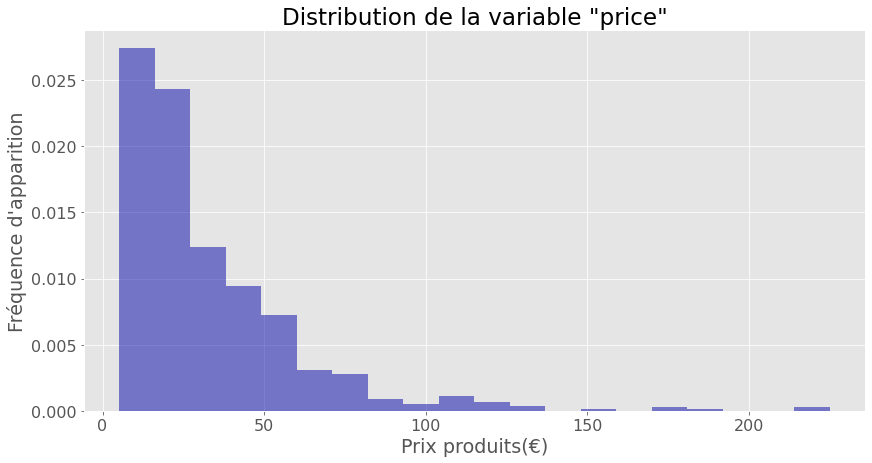

In [65]:
#Visualisation (Histogramme)de la distribution des prix produits
df_Globalca['price'].hist(color='#0504aa', alpha=0.5, density=True, bins=20)

plt.title('Distribution de la variable "price"')
plt.xlabel('Prix produits(€)')
plt.ylabel('Fréquence d\'apparition')
plt.show()

# 3.2.2 Analyse de concentration


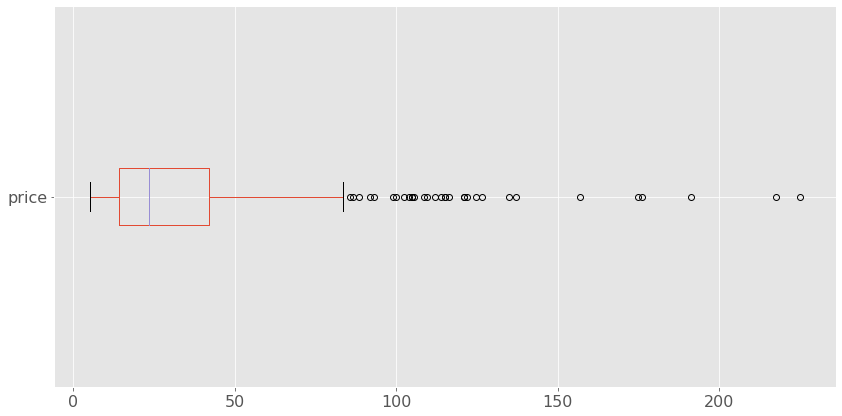

In [66]:
## distribution interquartile
df_Globalca.boxplot(column="price", vert=False)
plt.show()

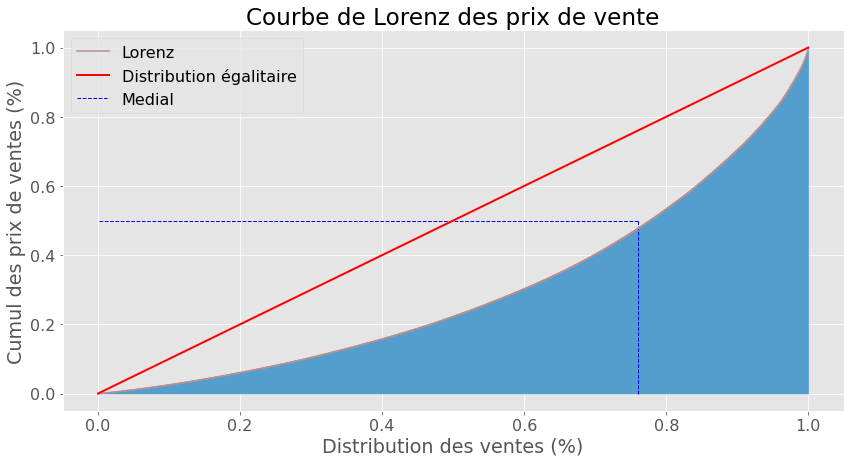

In [67]:
#Courbe de Lorenz sur la variables des prix
df_price = df_Globalca['price'].values
#Sélection du sous-échantillon de travail que l'on appelle price

#On place les observations dans une variable
lorenz_price = np.cumsum(np.sort(df_price)) / df_price.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations

plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc="best")
plt.show()

On constate que 76% des ventes représentent 50% du montant total des prix de vente. Ce n'est pas une égalité totale

# 3) Analyse du chiffre d'affaire 

In [68]:
df_Globalca

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,15300,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,19814,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,19815,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,16135,0.0,0.0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
820,7023,1,27.5,15,instock,15891,15891,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,1,69.0,2,instock,15887,15887,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,1,54.8,23,instock,13127-1,13127-1,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [69]:
df_Globalca[['total_sales','price']].cumsum(axis=1) 

,total_sales,price
0,6.0,30.2
1,0.0,34.3
2,0.0,20.8
3,3.0,17.1
4,0.0,46.0
...,...,...
819,5.0,13.4
820,0.0,27.5
821,0.0,69.0
822,0.0,54.8


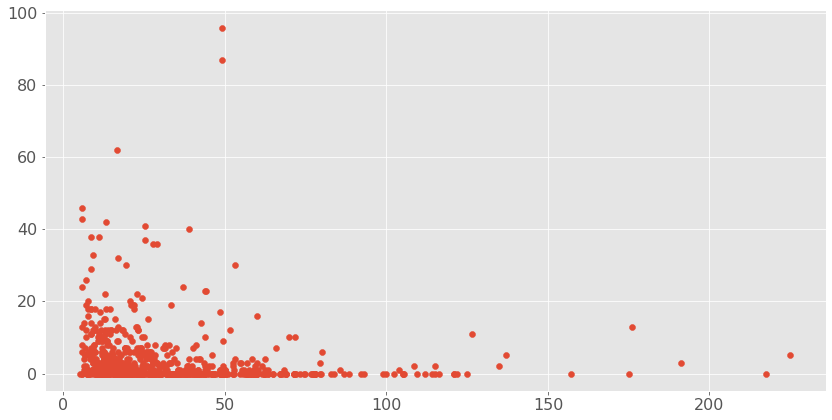

In [70]:
x = df_Globalca.price
y = df_Globalca.total_sales
plt.scatter(x,y)

# 3.1 Calcul du Chiffre d'affaire

### A) Chiffre d'affaire par produits:


In [125]:
print(df_Globalca.groupby("post_title")[["CA_produits"]].prod())

                                                    CA_produits
post_title                                                     
Agnès Levet Côte Rôtie Améthyste 2017                     164.8
Agnès Levet Côte Rôtie Maestria 2017                      165.0
Agnès Levet Côte Rôtie Péroline 2017                      171.0
Alain Graillot Crozes-Hermitage Blanc 2018                244.0
Alain Graillot Crozes-Hermitage Rouge 2017                146.4
...                                                         ...
Zind-Humbrecht Pinot Gris Roche Calcaire 2017               0.0
Zind-Humbrecht Riesling Clos Windsbuhl 2014                 0.0
Zind-Humbrecht Riesling Grand Cru Rangen De Tha...          0.0
Zind-Humbrecht Riesling Herrenweg de Turckheim ...         63.4
Zind-Humbrecht Zind 2017                                  154.2

[711 rows x 1 columns]


### A) Chiffre d'affaire global:

In [104]:
sum(df_Globalca["total_sales"]*df_Globalca["price"])

70568.6

# 3.2 Zscore

In [105]:
def find_z_score(data):
    threshold = 2
    outliers = list()

    data_mean = np.mean(data)
    data_std = np.std(data)

    for y in data:
        z_score = (y - data_mean)/data_std
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

def find_quartiles(data):
    data = sorted(data)
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    # any values outside lower_bound and upper_bound is outlier
    return lower_bound, upper_bound

In [106]:
find_z_score(df_Globalca.price)

[100.0,
 88.4,
 225.0,
 126.5,
 176.0,
 108.5,
 157.0,
 104.0,
 109.6,
 102.3,
 137.0,
 217.5,
 105.0,
 105.0,
 112.0,
 92.0,
 124.8,
 175.0,
 191.3,
 93.0,
 122.0,
 114.0,
 135.0,
 105.6,
 116.4,
 115.0,
 121.0,
 99.0,
 115.0,
 121.0]

In [107]:
len(find_z_score(df_Globalca.price))

30

In [108]:
#create one-dimensional array
df_Zscore = np.array([df_Globalca.price])
#calculate z-score
result = zscore(df_Globalca.price)
#Print the result
print("Z-score array: ",result)


Z-score array:  [-2.98410437e-01  6.50160107e-02 -4.20752013e-01 -6.61836884e-01
  4.86014964e-01  6.50160107e-02  7.44350421e-03 -4.65307206e-02
  9.89774396e-01  3.63673388e-01  1.70943073e+00 -5.10709054e-01
 -3.48786380e-01 -4.74726238e-01 -3.84769196e-01 -8.92126910e-01
  4.34263208e-02  4.24844176e-01  1.40717507e+00 -7.12212827e-01
 -8.56144093e-01 -8.56144093e-01 -8.56144093e-01 -7.40999080e-01
 -7.40999080e-01 -6.47443757e-01 -6.51042039e-01 -4.67529674e-01
 -4.20752013e-01 -3.77572633e-01 -5.71879842e-01  9.89774396e-01
 -3.27196690e-01  2.54349125e-02 -1.77444674e-02  1.63026853e+00
 -7.12212827e-01 -6.40247194e-01 -6.63636025e-01 -3.45188098e-01
  4.14049331e-01  1.62169615e-01  2.34135249e-01 -5.57486716e-01
 -3.34393253e-01 -4.85521083e-01 -5.79076406e-01 -6.51042039e-01
 -6.76230010e-01 -7.15811109e-01 -3.48786380e-01 -7.08614545e-01
 -3.73974351e-01 -7.08614545e-01 -6.00666096e-01 -6.00666096e-01
 -5.82674687e-01 -5.82674687e-01 -8.20161277e-01 -9.24511445e-01
 -7.15811

In [109]:
df_Globalca.price.describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [110]:
df_Globalca.price.describe().mean()

135.5410827721532

In [111]:
find_quartiles(df_Globalca.price)

(-28.012500000000003, 84.28750000000001)

## 3.4 Fonction Outlier

In [112]:
def OUTlier(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [113]:
OUTlier(df_Globalca.price)

(-28.012500000000003, 84.28750000000001)

In [114]:
lowerbound,upperbound = OUTlier(df_Globalca.price)

In [115]:
lowerbound,upperbound

(-28.012500000000003, 84.28750000000001)

## 3.5 Fonction IQR

In [116]:
def find_iqr(x): 
    return np.subtract(*np.percentile(x, [75, 25]))

#calcule IQR for 'price' and 'total_sales' columns
df_Globalca[['price', 'total_sales']].apply(find_iqr)




price          28.075
total_sales     4.000
dtype: float64

In [117]:
df_Globalca[(df_Globalca.price < lowerbound) | (df_Globalca.price > upperbound)]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,ca_product,CA_produits
154,4115,1,100.0,11,instock,15382,15382,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,0.0
156,4132,1,88.4,5,instock,11668,11668,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,0.0
291,4352,1,225.0,0,outofstock,15940,15940,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1125.0,1125.0
293,4355,1,126.5,2,instock,12589,12589,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1391.5,1391.5
297,4359,1,85.6,0,outofstock,13853,13853,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,85.6,85.6
310,4402,1,176.0,8,instock,3510,3510,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2288.0,2288.0
311,4404,1,108.5,2,instock,3507,3507,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,217.0,217.0
313,4406,1,157.0,3,instock,7819,7819,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,0.0
314,4407,1,104.0,6,instock,3509,3509,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,104.0,104.0
320,4582,1,109.6,7,instock,12857,12857,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0,0.0


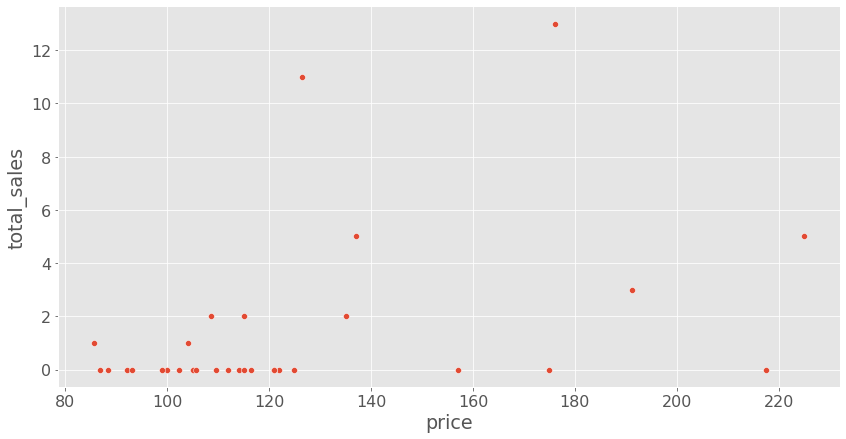

In [118]:
sns.scatterplot(data = df_Globalca[(df_Globalca.price < lowerbound) | (df_Globalca.price > upperbound)], x = "price", y = "total_sales")

plt.show()

In [119]:
len(df_Globalca[(df_Globalca.price < lowerbound) | (df_Globalca.price > upperbound)])

32

In [120]:
print((df_Globalca[(df_Globalca.price < lowerbound) | (df_Globalca.price > upperbound)]).columns)


Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'id_web', 'sku', 'virtual', 'downloadable', 'rating_count',
       'average_rating', 'total_sales', 'tax_status', 'tax_class',
       'post_author', 'post_date', 'post_date_gmt', 'post_content',
       'post_title', 'post_excerpt', 'post_status', 'comment_status',
       'ping_status', 'post_password', 'post_name', 'post_modified',
       'post_modified_gmt', 'post_content_filtered', 'post_parent', 'guid',
       'menu_order', 'post_type', 'post_mime_type', 'comment_count', '_merge',
       'ca_product', 'CA_produits'],
      dtype='object')


In [123]:
wineoutlier = ['post_title','price']

df_Globalca[(df_Globalca.price < lowerbound) | (df_Globalca.price > upperbound)][vin]

,post_title,price
154,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,100.0
156,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,88.4
291,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0
293,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5
297,Champagne Larmandier-Bernier Grand Cru Les Che...,85.6
310,Cognac Frapin VIP XO,176.0
311,Cognac Frapin Château de Fontpinot XO,108.5
313,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0
314,Cognac Frapin Cigar Blend,104.0
320,Château de Meursault Puligny-Montrachet 1er Cr...,109.6
